#### This notebook aims to show the implementation of ANN for Regression problem.

In [26]:
# import dependancies

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



#### Dataset info

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Average Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. 

**Attribute Information:**

Features consist of hourly average ambient variables

- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW 

In [3]:
# Reading Dataset

df = pd.read_csv("PowerPlantData.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [5]:
df.sample(10)

,AT,V,AP,RH,PE
6081,16.20,38.73,1002.14,75.03,467.89
1384,25.42,69.71,1009.29,82.50,435.59
8022,14.24,45.01,1013.54,88.68,461.64
5631,10.06,39.61,1018.22,70.22,471.86
6311,11.69,39.22,1017.05,55.51,472.76
2356,29.81,73.67,1005.60,60.91,430.67
3457,32.74,68.31,1010.23,41.29,441.66
7286,30.03,70.02,1010.07,64.20,436.88
4742,10.63,40.67,1017.13,66.12,483.27
4459,23.47,59.22,1013.44,83.33,442.13


In [7]:
df.columns.to_list()

['AT', 'V', 'AP', 'RH', 'PE']

In [11]:
df.shape

(9568, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [13]:
# 5 Point summary
# Stats of the dataset

df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


All the values are numerical and continuous values,so there is not need to transform the data into numerical values as seen

#### EDA

In [12]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

There is no any missing value in the data set as seen

In [15]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

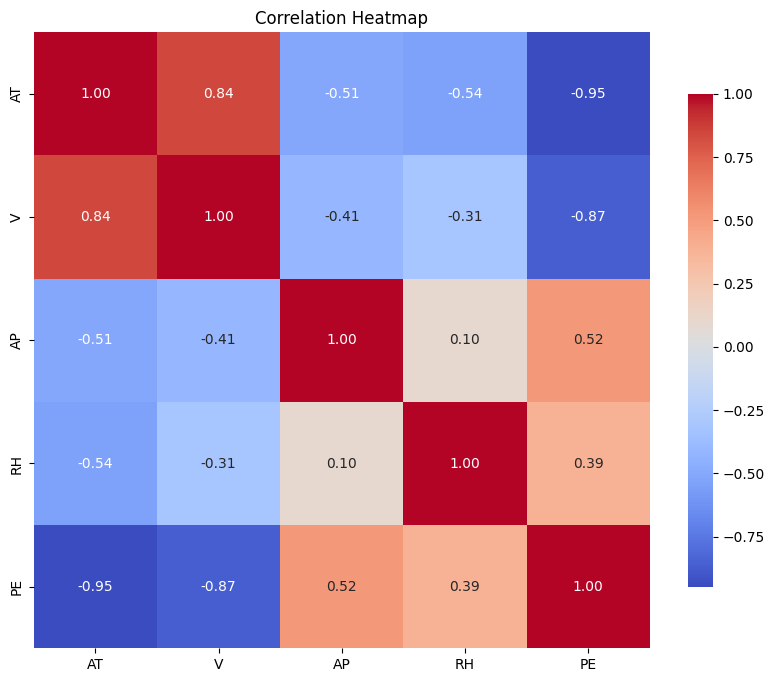

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show() 

In [19]:
df.corr()["PE"].sort_values(ascending=False)

PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

**Observation**

- There is strong positive correlation between Net Hourly Electrical Energy Output and Ambient Pressure
- Very strong negative correlation between Net Hourly Electrical Energy Output and Average Temperature or Exhaust Vacuum.

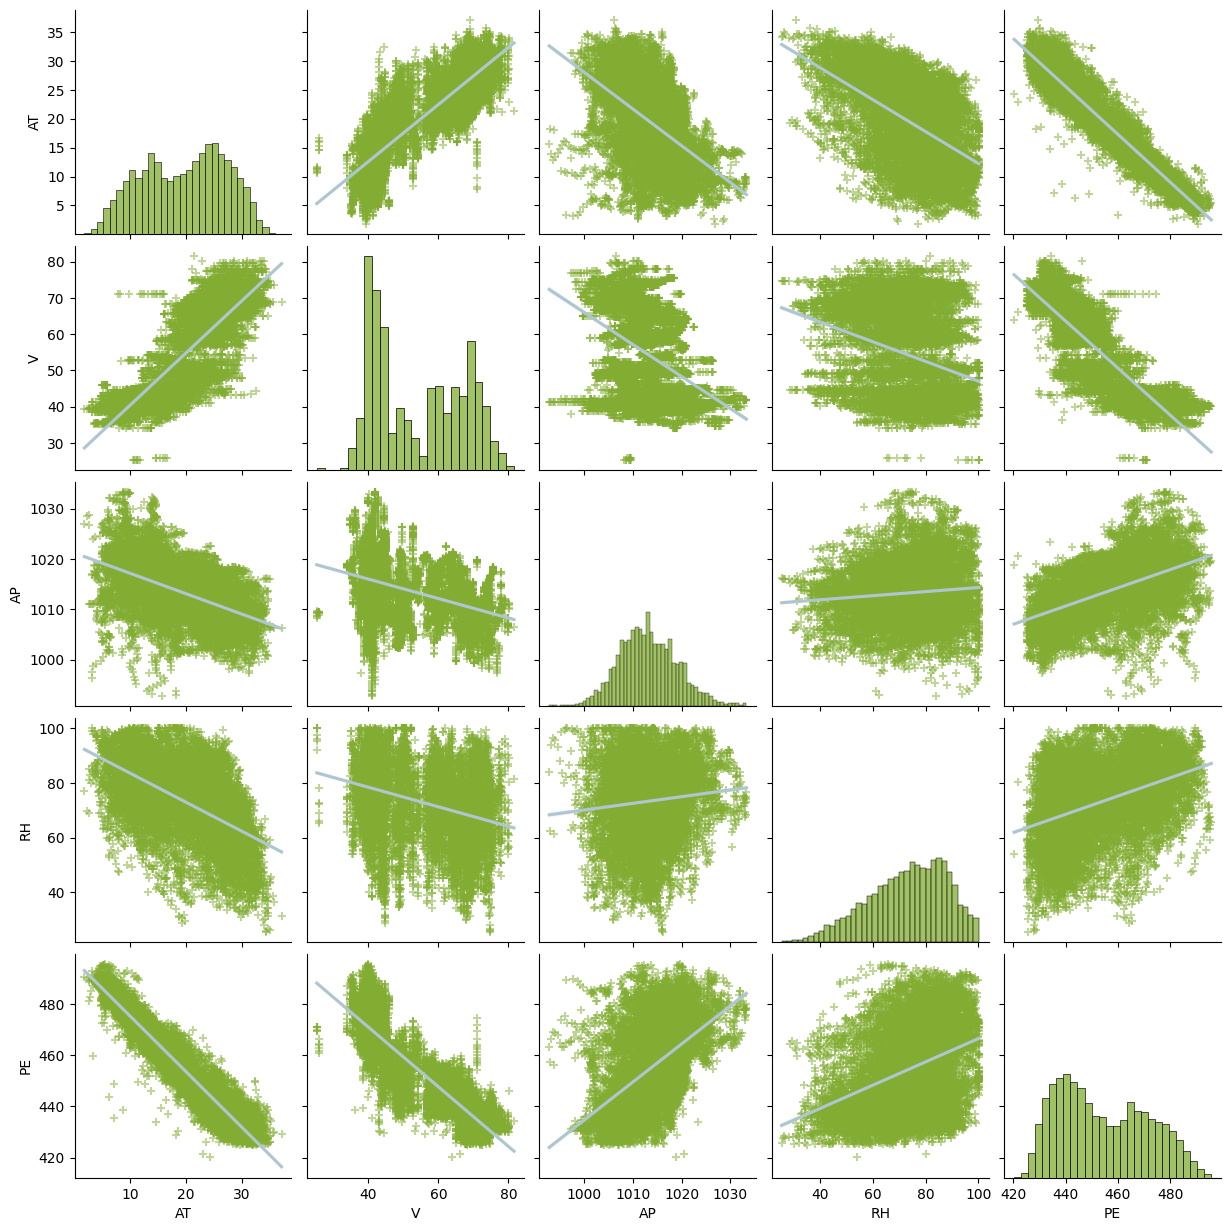

In [20]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

In [21]:
# Splitting the dataset into X and y
X = df.drop("PE", axis=1).values
y = df["PE"].values
print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7176, 4)
(2392, 4)
(7176,)
(2392,)


In [23]:
# Feature Scaling
# Standardization of the dataset

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-1.56080357 -1.25245691  1.32870923  0.89387562]
 [-1.81519199 -1.24300868 -0.06957792  1.3919209 ]
 [ 0.66139369  0.7025391   0.09195706  0.61991656]
 ...
 [ 1.09614215  1.17652524 -0.06452995 -1.88533998]
 [-0.99415    -1.00680296  0.27368391  1.10019891]
 [-1.0627945  -1.08160144  0.81549914  1.66656315]]
[[-8.23787952e-04 -4.90299789e-01  2.63587971e-01  1.12989824e-01]
 [ 1.15940276e+00  1.17652524e+00 -3.92901118e-02 -2.13197146e+00]
 [ 1.12171559e+00  1.01433065e+00 -9.96721385e-01  1.35535083e-01]
 ...
 [-3.87117315e-01 -3.85581919e-01  9.02997257e-01  1.54085625e+00]
 [-9.95495971e-01 -7.64298424e-01  5.42908870e-01  5.35884234e-01]
 [ 1.86266109e-01  7.53717005e-01  2.68635939e-01 -1.08363632e-01]]


In [ ]:
# Model Building

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
reg_ann = Sequential()                         
reg_ann.add(Dense(units=64, input_shape=(X_train.shape[1],), activation="relu"))  
reg_ann.add(Dense(units=32, activation="relu"))  
reg_ann.add(Dense(units=1))
reg_ann.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
reg_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
reg_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
reg_ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 198655.5781 - mae: 445.0141 - val_loss: 99758.6875 - val_mae: 312.2187
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58260.4883 - mae: 220.2923 - val_loss: 14099.5029 - val_mae: 101.2660
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11417.9473 - mae: 89.9157 - val_loss: 5715.5063 - val_mae: 63.2405
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4532.5015 - mae: 55.5406 - val_loss: 2203.3000 - val_mae: 38.2028
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1801.6519 - mae: 33.9120 - val_loss: 1030.9001 - val_mae: 25.1705
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 901.6067 - mae: 23.3447 - val_loss: 573.4781 - val_mae: 18.4293
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 504.3071 - mae: 17.2095 - val_loss: 354.0410 - val_mae: 14.3750
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 303.1261 - mae: 13.2503 - val_loss: 228.4440

In [39]:
reg_ann.history.history

{'loss': [177661.015625,
  35301.61328125,
  9383.7724609375,
  3609.80712890625,
  1502.1458740234375,
  767.8099365234375,
  453.1596374511719,
  286.3717346191406,
  191.05276489257812,
  133.6646728515625,
  98.53875732421875,
  75.36404418945312,
  59.926605224609375,
  49.533626556396484,
  42.06930160522461,
  36.840919494628906,
  32.59405517578125,
  29.56861686706543,
  27.288253784179688,
  25.252492904663086,
  23.863317489624023,
  22.933513641357422,
  21.87229347229004,
  21.32210922241211,
  20.641159057617188,
  20.274457931518555,
  20.188852310180664,
  19.754690170288086,
  19.478775024414062,
  19.65424156188965,
  19.274227142333984,
  19.39691162109375,
  19.08580780029297,
  18.8909969329834,
  19.40272331237793,
  19.06174087524414,
  18.986541748046875,
  19.38772964477539,
  19.053163528442383,
  19.090375900268555,
  19.32442855834961,
  18.799753189086914,
  19.52025032043457,
  19.039302825927734,
  18.711994171142578,
  18.758136749267578,
  18.9539031982

In [38]:
pd.DataFrame(reg_ann.history.history)

,loss,mae,val_loss,val_mae
0,177661.015625,419.114319,99758.687500,312.218719
1,35301.613281,161.025787,14099.502930,101.266022
2,9383.772461,81.174721,5715.506348,63.240517
3,3609.807129,49.067001,2203.300049,38.202808
4,1502.145874,30.657925,1030.900146,25.170525
5,767.809937,21.360098,573.478149,18.429314
6,453.159637,16.254602,354.040985,14.375021
7,286.371735,12.928483,228.443954,11.541541
8,191.052765,10.546673,157.348877,9.329729
9,133.664673,8.785173,113.592049,7.937987


<Axes: >

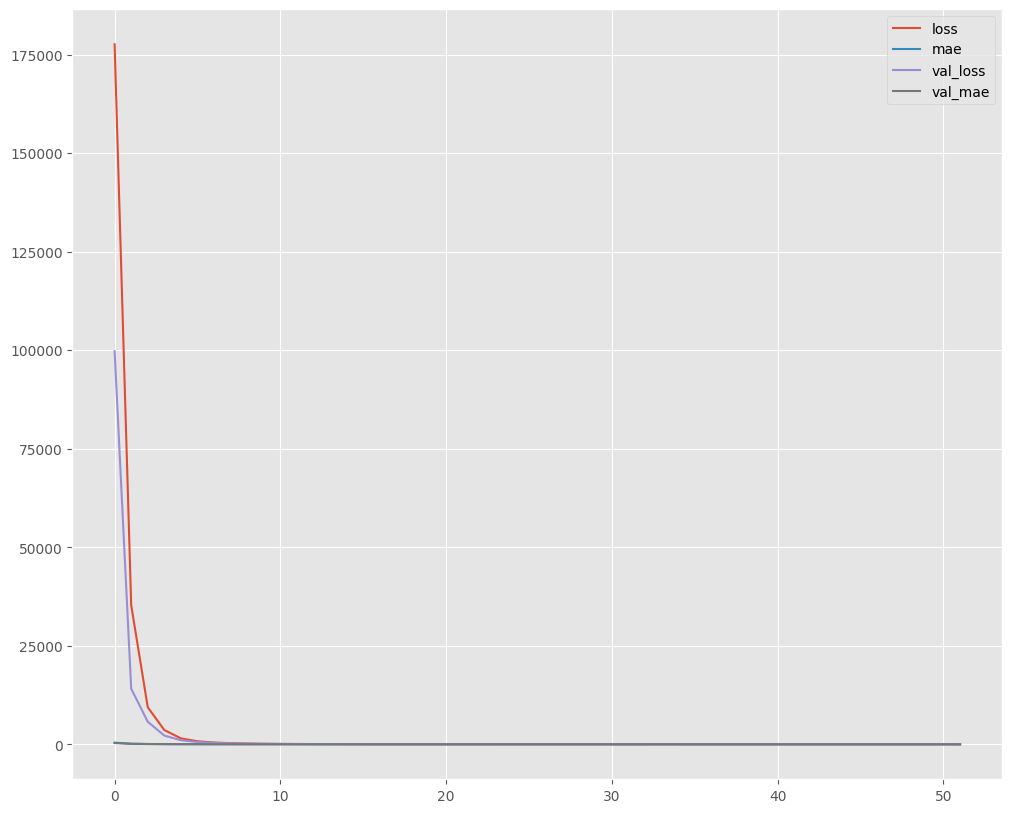

In [42]:
plt.style.use("ggplot")
pd.DataFrame(reg_ann.history.history).plot(figsize=(12,10))

our deep learning model performs very well

In [43]:
reg_ann.evaluate(X_train,y_train)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1593 - mae: 3.3522


[17.789480209350586, 3.289276599884033]

In [44]:
reg_ann.evaluate(X_test,y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9877 - mae: 3.2629


[17.94208335876465, 3.27274227142334]

In [45]:
predictions = reg_ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Real Values,Predictions
0,455.27,454.415253
1,436.31,437.857574
2,440.68,433.809265
3,434.40,437.906006
4,482.06,480.181366
...,...,...
2387,479.78,481.842682
2388,434.52,433.470612
2389,459.38,457.202484
2390,475.24,469.495697


As seen above in the comparison dataframe, the predictions of the model is very close to the actual values.

In [47]:
print(y_test.shape)       
print(predictions.shape)

(2392,)
(2392, 1)


In [50]:
y_pred = reg_ann.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 17.94
R² Score: 0.94


In [51]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.272741705853006
MSE: 17.942084673852783
RMSE: 4.235809801425553
